## Load required packages

In [1]:
using Pkg # import the Pkg module so we can use other packages
Pkg.add("CSV") # install CSV package so we can work with the data provided in a CSV file
Pkg.add("DataFrames") # install to allow to change and analyse the dataframes
Pkg.add("Plots") # for plotting

   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\diann\.julia\environments\v1.9\Manifest.toml`


## Load the fact table after NZ data added

In [2]:
using CSV # import to use CSV package
using DataFrames # import to use DataFrames package

fact_table = CSV.read("fact-table.csv", DataFrame) # fact table of WHO data that had been wrangled in R and NZ data added in

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,String,String,String,String,String,String,String
1,BDI2000B,BDI,2000,BTSX,24,43.78,36.8,NA,NA,NA,NA
2,BDI2000F,BDI,2000,FMLE,16.4,45.85,35.47,NA,NA,NA,NA
3,BDI2000M,BDI,2000,MLE,31.5,41.79,38.51,NA,NA,NA,NA
4,BDI2005B,BDI,2005,BTSX,19.8,NA,31.61,NA,NA,NA,NA
5,BDI2005F,BDI,2005,FMLE,12.7,NA,30.55,NA,NA,NA,NA
6,BDI2005M,BDI,2005,MLE,26.9,NA,33.06,NA,NA,NA,NA
7,BDI2010B,BDI,2010,BTSX,16.6,58.6,27.92,NA,NA,800,0.56
8,BDI2010F,BDI,2010,FMLE,9.9,60.32,26.42,NA,NA,NA,NA
9,BDI2010M,BDI,2010,MLE,23.3,56.86,29.78,NA,NA,NA,NA


### Wrangle the data

In [3]:
NZL_df = filter(row -> row.CountryCode == "NZL" && row.GenderCode == "BTSX", fact_table) # create new df of only NZ data from fact table

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,String,String,String,String,String,String,String
1,NZL2000B,NZL,2000,BTSX,25,78.57,15.92,NA,NA,NA,NA
2,NZL2005B,NZL,2005,BTSX,23.7,NA,13.3,NA,NA,NA,NA
3,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NA,NA,14.38,0.8
4,NZL2015B,NZL,2015,BTSX,16.45,81.31,10.91,NA,NA,26.425,NA
5,NZL2018B,NZL,2018,BTSX,14.7,NA,10.41,NA,NA,35.0175,0.82
6,NZL2019B,NZL,2019,BTSX,13.7,81.96,10.26,NA,NA,37.48,NA
7,NZL2020B,NZL,2020,BTSX,10.9,NA,NA,23.04,34.9,29.9,0.82
8,NZL2023B,NZL,2023,BTSX,NA,NA,NA,NA,NA,NA,NA
9,NZL2025B,NZL,2025,BTSX,11.2,NA,NA,NA,NA,NA,NA


In [4]:
# function that changes missing values to NaN and converts string to float
function custom_parse_float(x)
    try
        return parse(Float64, x)
    catch
        return NaN
    end
end

custom_parse_float (generic function with 1 method)

In [5]:
columns = [:MediumPriceEstTobacco, :TobaccoPrevalence, :LifeExpectancy, :Mortality, :LowestPricEstTobacco, :PremiumPricEstTobacco, :TotalTax]

for col in columns
    NZL_df[!, col] = [custom_parse_float(x) for x in NZL_df[!, col]] # convert to float and replace NA with NaN using previously defined function
end

NZL_df

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2000B,NZL,2000,BTSX,25.0,78.57,15.92,NaN,NaN,NaN,NaN
2,NZL2005B,NZL,2005,BTSX,23.7,NaN,13.3,NaN,NaN,NaN,NaN
3,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8
4,NZL2015B,NZL,2015,BTSX,16.45,81.31,10.91,NaN,NaN,26.425,NaN
5,NZL2018B,NZL,2018,BTSX,14.7,NaN,10.41,NaN,NaN,35.0175,0.82
6,NZL2019B,NZL,2019,BTSX,13.7,81.96,10.26,NaN,NaN,37.48,NaN
7,NZL2020B,NZL,2020,BTSX,10.9,NaN,NaN,23.04,34.9,29.9,0.82
8,NZL2023B,NZL,2023,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NZL2025B,NZL,2025,BTSX,11.2,NaN,NaN,NaN,NaN,NaN,NaN


### Start plotting

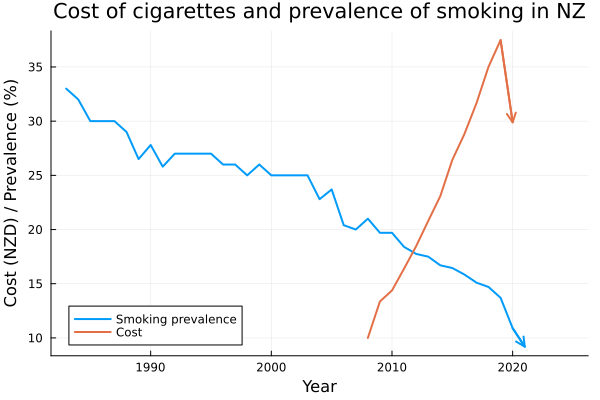

In [6]:
using Plots

y = [NZL_df.TobaccoPrevalence, NZL_df.MediumPriceEstTobacco]
plot(NZL_df.Year, y, seriestype=:line, label=["Smoking prevalence" "Cost"], 
    title="Cost of cigarettes and prevalence of smoking in NZ", ylabel="Cost (NZD) / Prevalence (%)", xlabel="Year", 
    legend=:bottomleft, lw=2, arrow = :arrow, size = (600, 400))

# filter out 2020. The 2020 value for cost was a WHO value, rather than StatsNZ value, thus not measuring the same way

In [7]:
NZL_df[7, :MediumPriceEstTobacco] = NaN # remove value by setting it to missing

NaN

In [8]:
filtered_nzl = filter(row -> row.Year >= 2009, NZL_df) # filter for years from 2009 (the years we have cost data for)

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8
2,NZL2015B,NZL,2015,BTSX,16.45,81.31,10.91,NaN,NaN,26.425,NaN
3,NZL2018B,NZL,2018,BTSX,14.7,NaN,10.41,NaN,NaN,35.0175,0.82
4,NZL2019B,NZL,2019,BTSX,13.7,81.96,10.26,NaN,NaN,37.48,NaN
5,NZL2020B,NZL,2020,BTSX,10.9,NaN,NaN,23.04,34.9,NaN,0.82
6,NZL2023B,NZL,2023,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NZL2025B,NZL,2025,BTSX,11.2,NaN,NaN,NaN,NaN,NaN,NaN
8,NZL2009B,NZL,2009,BTSX,19.7,NaN,11.98,NaN,NaN,13.365,NaN
9,NZL2011B,NZL,2011,BTSX,18.4,NaN,11.89,NaN,NaN,16.39,NaN


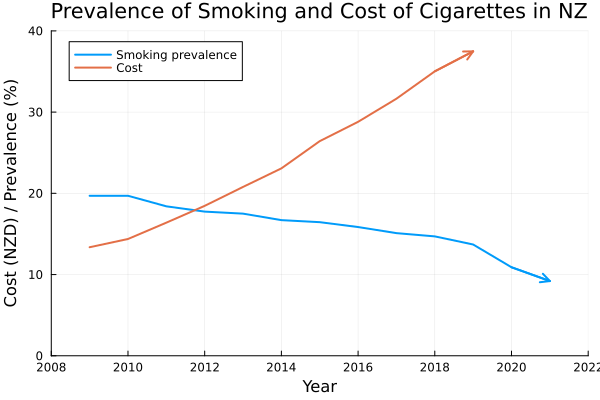

In [9]:
y = [filtered_nzl.TobaccoPrevalence, filtered_nzl.MediumPriceEstTobacco]
plot(filtered_nzl.Year, y, seriestype=:line, label=["Smoking prevalence" "Cost"], 
    title="Prevalence of Smoking and Cost of Cigarettes in NZ", ylabel="Cost (NZD) / Prevalence (%)", xlabel="Year", 
    legend=:topleft, lw=2, arrow = :arrow, size = (600, 400), ylims=(0, 40), xlims=(2008, 2022))

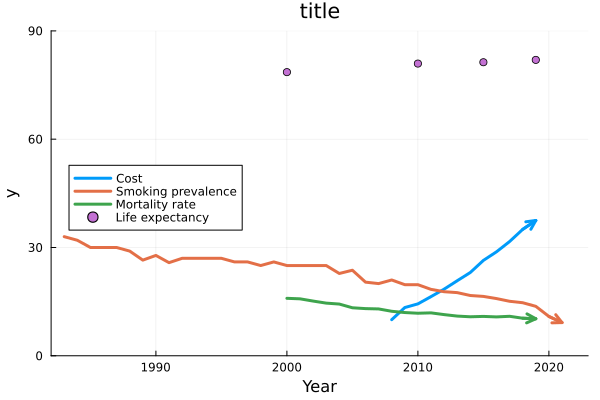

In [10]:
y_life = NZL_df.LifeExpectancy
y_mort = NZL_df.Mortality
y_cost = NZL_df.MediumPriceEstTobacco
y_prev = NZL_df.TobaccoPrevalence

plot(
    NZL_df.Year, y_cost, seriestype=:line, label="Cost",
    title="title",
    ylabel="y", xlabel="Year",
    legend=:left, lw=3, size=(600, 400), arrow = :arrow, ylims=(0, 90), xlims=(1982, 2023),
)
plot!(
    NZL_df.Year, y_prev, seriestype=:line, lw=3, label="Smoking prevalence", arrow = :arrow,
   )
plot!(
    NZL_df.Year, y_mort, seriestype=:line, lw=3, label="Mortality rate", arrow = :arrow,
   )
plot!(
    NZL_df.Year, y_life, seriestype=:scatter, lw=3, label="Life expectancy",
   )

# can't plot life expectancy due to missing values?  

In [11]:
filtered_nzl_life = filter(row -> row.Year >= 2000, NZL_df) # filter for years from 2000

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2000B,NZL,2000,BTSX,25.0,78.57,15.92,NaN,NaN,NaN,NaN
2,NZL2005B,NZL,2005,BTSX,23.7,NaN,13.3,NaN,NaN,NaN,NaN
3,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8
4,NZL2015B,NZL,2015,BTSX,16.45,81.31,10.91,NaN,NaN,26.425,NaN
5,NZL2018B,NZL,2018,BTSX,14.7,NaN,10.41,NaN,NaN,35.0175,0.82
6,NZL2019B,NZL,2019,BTSX,13.7,81.96,10.26,NaN,NaN,37.48,NaN
7,NZL2020B,NZL,2020,BTSX,10.9,NaN,NaN,23.04,34.9,NaN,0.82
8,NZL2023B,NZL,2023,BTSX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NZL2025B,NZL,2025,BTSX,11.2,NaN,NaN,NaN,NaN,NaN,NaN


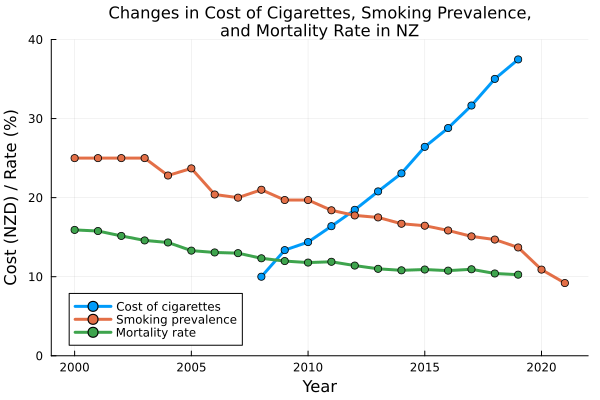

In [12]:
y_mort = filtered_nzl_life.Mortality
y_cost = filtered_nzl_life.MediumPriceEstTobacco
y_prev = filtered_nzl_life.TobaccoPrevalence

plot(
    filtered_nzl_life.Year, y_cost, seriestype=:line, label="Cost of cigarettes",
    title="Changes in Cost of Cigarettes, Smoking Prevalence,\nand Mortality Rate in NZ",
    titlefont = font(11),
    ylabel="Cost (NZD) / Rate (%)", xlabel="Year", marker=:circle,
    legend=:bottomleft, lw=3, size= (600, 400),  ylims=(0, 40), xlims=(1999, 2022),
)
plot!(
    filtered_nzl_life.Year, y_prev, seriestype=:line, lw=3, label="Smoking prevalence", marker=:circle,
   )
plot!(
    filtered_nzl_life.Year, y_mort, seriestype=:line, lw=3, label="Mortality rate", marker=:circle,
   )

# savefig("NZ_cost_prevalence_mortality_2.png")

In [13]:
filter!(row -> !isnan(row.LifeExpectancy), filtered_nzl_life) # remove rows where life expectancy is NaN so can plot lines

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2000B,NZL,2000,BTSX,25.0,78.57,15.92,NaN,NaN,NaN,NaN
2,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8
3,NZL2015B,NZL,2015,BTSX,16.45,81.31,10.91,NaN,NaN,26.425,NaN
4,NZL2019B,NZL,2019,BTSX,13.7,81.96,10.26,NaN,NaN,37.48,NaN


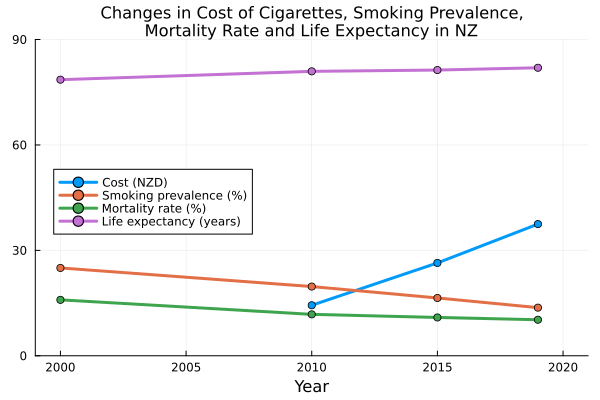

In [14]:
y_life = filtered_nzl_life.LifeExpectancy
y_mort = filtered_nzl_life.Mortality
y_cost = filtered_nzl_life.MediumPriceEstTobacco
y_prev = filtered_nzl_life.TobaccoPrevalence

plot(
    filtered_nzl_life.Year, y_cost, seriestype=:line, label="Cost (NZD)",
    title="Changes in Cost of Cigarettes, Smoking Prevalence,\nMortality Rate and Life Expectancy in NZ",
    titlefont = font(11),
    ylabel="", xlabel="Year",
    legend=:left,legendcolumns=1, 
    lw=3, marker=:circle, size=(600, 400), ylims=(0, 90), xlims=(1999, 2021), 
)
plot!(
    filtered_nzl_life.Year, y_prev, seriestype=:line, lw=3, label="Smoking prevalence (%)", marker=:circle,
   )
plot!(
    filtered_nzl_life.Year, y_mort, seriestype=:line, lw=3, label="Mortality rate (%)", marker=:circle,
   )
plot!(
    filtered_nzl_life.Year, y_life, seriestype=:line, lw=3, label="Life expectancy (years)", marker=:circle,                     
   )

#savefig("NZ_cost_prevalence_mortality_lifeexp_3.png")

In [15]:
filtered_tax = filter(row -> !isnan(row.MediumPriceEstTobacco) && !isnan(row.TotalTax), NZL_df) # remove rows where cost and tax are NaN so can calculate tax amount
filtered_tax

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8
2,NZL2018B,NZL,2018,BTSX,14.7,NaN,10.41,NaN,NaN,35.0175,0.82
3,NZL2008B,NZL,2008,BTSX,21.0,NaN,12.33,NaN,NaN,10.0,0.7
4,NZL2012B,NZL,2012,BTSX,17.75,NaN,11.41,NaN,NaN,18.46,0.74
5,NZL2014B,NZL,2014,BTSX,16.7,NaN,10.81,NaN,NaN,23.0725,0.77
6,NZL2016B,NZL,2016,BTSX,15.85,NaN,10.77,NaN,NaN,28.805,0.75


In [16]:
filtered_tax.cost_tax = filtered_tax.MediumPriceEstTobacco .* filtered_tax.TotalTax # calculating amount of tax

filtered_tax

Row,ID,CountryCode,Year,GenderCode,TobaccoPrevalence,LifeExpectancy,Mortality,LowestPricEstTobacco,PremiumPricEstTobacco,MediumPriceEstTobacco,TotalTax,cost_tax
,String,String,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,NZL2010B,NZL,2010,BTSX,19.7,80.94,11.79,NaN,NaN,14.38,0.8,11.504
2,NZL2018B,NZL,2018,BTSX,14.7,NaN,10.41,NaN,NaN,35.0175,0.82,28.7143
3,NZL2008B,NZL,2008,BTSX,21.0,NaN,12.33,NaN,NaN,10.0,0.7,7.0
4,NZL2012B,NZL,2012,BTSX,17.75,NaN,11.41,NaN,NaN,18.46,0.74,13.6604
5,NZL2014B,NZL,2014,BTSX,16.7,NaN,10.81,NaN,NaN,23.0725,0.77,17.7658
6,NZL2016B,NZL,2016,BTSX,15.85,NaN,10.77,NaN,NaN,28.805,0.75,21.6037


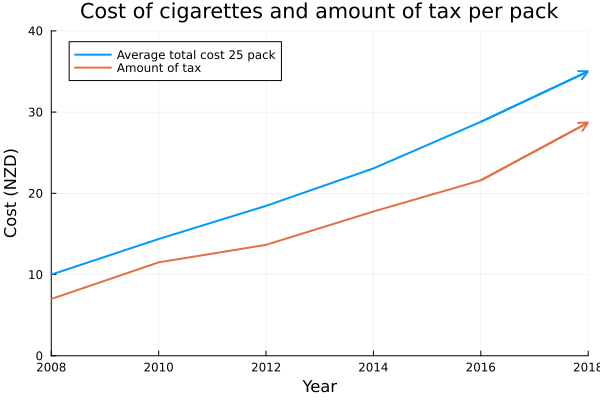

In [17]:
y = [filtered_tax.MediumPriceEstTobacco, filtered_tax.cost_tax]
plot(filtered_tax.Year, y, seriestype=:line, label=["Average total cost 25 pack" "Amount of tax"], 
    title="Cost of cigarettes and amount of tax per pack", ylabel="Cost (NZD)", xlabel="Year", 
    legend=:topleft, lw=2, arrow = :arrow, size = (600, 400), ylims=(0, 40), xlims=(2008, 2018))